In [32]:
import json

import os.path

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import typing
import my_utils.gainratio as gr # my own realization of gain ratio
import my_utils.statistics as stat # some functions to get info about pd.DataFrame
import my_utils.converter as cnvt

In [33]:
df = pd.read_csv('./row/agaricus-lepiota.data', sep=',', names=[
    'is-poisonus', 'cap-shape', 'cap-surface', 'cap-color',
    'bruises?', 'odor', 'gill-attachment', 'gill-spacing',
    'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring',
    'veil-type', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
])
df

,is-poisonus,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [34]:
df.to_csv('./row/mushrooms.csv', index=False)

In [35]:
df, feature_replacement = cnvt.convert_characters_to_nums(df, '?')
df[df.columns] = df[df.columns].astype(float)
df.dtypes

is-poisonus                 float64
cap-shape                   float64
cap-surface                 float64
cap-color                   float64
bruises?                    float64
odor                        float64
gill-attachment             float64
gill-spacing                float64
gill-size                   float64
gill-color                  float64
stalk-shape                 float64
stalk-root                  float64
stalk-surface-above-ring    float64
stalk-surface-below-ring    float64
stalk-color-above-ring      float64
stalk-color-below-ring      float64
veil-type                   float64
veil-color                  float64
ring-number                 float64
ring-type                   float64
spore-print-color           float64
population                  float64
habitat                     float64
dtype: object

In [36]:
frame = stat.get_some_statistics_categorial(df)
frame

,is-poisonus,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
Процент_пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Мощность,2.000000,6.000000,4.000000,10.000000,2.000000,9.000000,2.000000,2.00000,2.000000,12.000000,...,4.000000,9.000000,9.000000,1.0,4.000000,3.000000,5.000000,9.000000,6.000000,7.000000
Мода,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.00000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000
Процент_моды,51.797144,45.002462,39.931068,28.114229,58.444116,43.426883,97.415066,83.85032,69.079271,21.270310,...,60.758247,54.948301,53.963565,100.0,97.538159,92.171344,48.842935,29.394387,49.729197,38.749385
Вторая_мода,0.000000,3.000000,0.000000,3.000000,0.000000,4.000000,1.000000,1.00000,0.000000,3.000000,...,3.000000,2.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
Процент_моды,48.202856,38.798621,31.462334,22.648941,41.555884,26.587888,2.584934,16.14968,30.920729,18.365337,...,28.360414,23.042836,23.042836,0.0,1.181684,7.385524,34.170359,24.224520,21.073363,26.440177


Удаляем <b>veil-type</b>, т.к. он имеет мощность 1

In [37]:
df = df.drop(['veil-type'], axis=1)

In [38]:
frame = stat.get_some_statistics_categorial(df)
frame

,is-poisonus,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
Процент_пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Мощность,2.000000,6.000000,4.000000,10.000000,2.000000,9.000000,2.000000,2.00000,2.000000,12.000000,...,4.000000,4.000000,9.000000,9.000000,4.000000,3.000000,5.000000,9.000000,6.000000,7.000000
Мода,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.00000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000
Процент_моды,51.797144,45.002462,39.931068,28.114229,58.444116,43.426883,97.415066,83.85032,69.079271,21.270310,...,63.712457,60.758247,54.948301,53.963565,97.538159,92.171344,48.842935,29.394387,49.729197,38.749385
Вторая_мода,0.000000,3.000000,0.000000,3.000000,0.000000,4.000000,1.000000,1.00000,0.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
Процент_моды,48.202856,38.798621,31.462334,22.648941,41.555884,26.587888,2.584934,16.14968,30.920729,18.365337,...,29.197440,28.360414,23.042836,23.042836,1.181684,7.385524,34.170359,24.224520,21.073363,26.440177


In [39]:
def show_statistics(df: pd.DataFrame) -> None:
    info_df = stat.get_some_statistics_categorial(df)
    for i in df.columns:
        plt.figure(i)
        sns.histplot(df[i], kde=False, stat="density")
        plt.show()

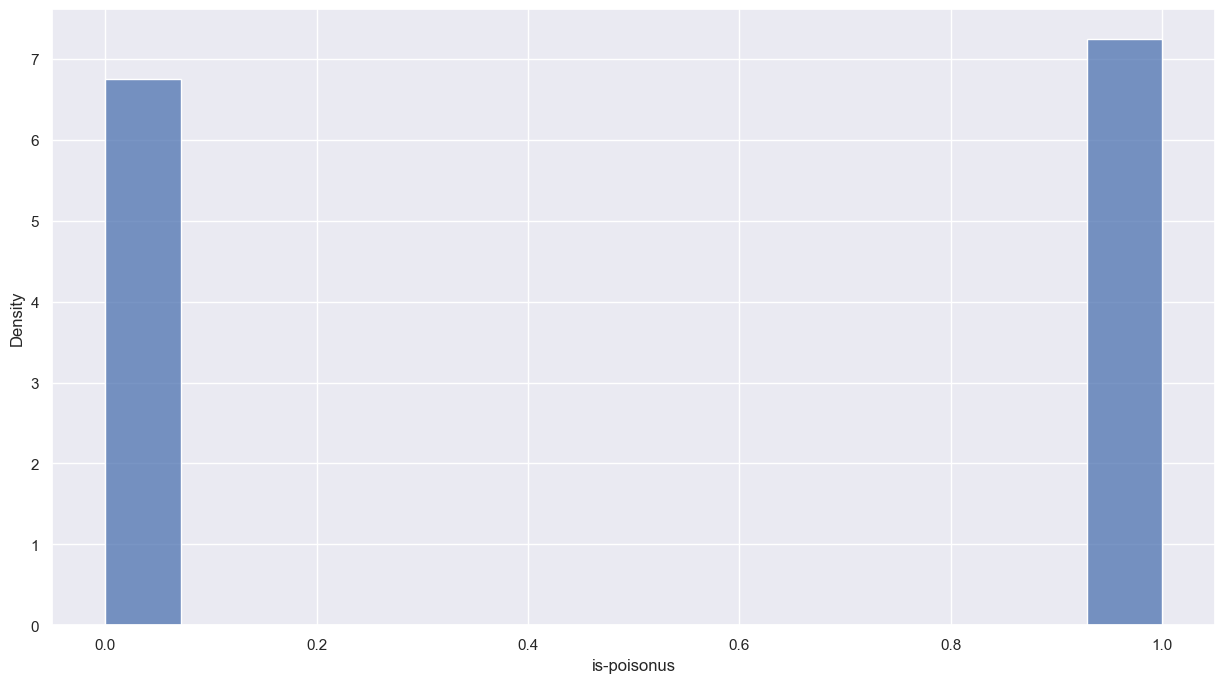

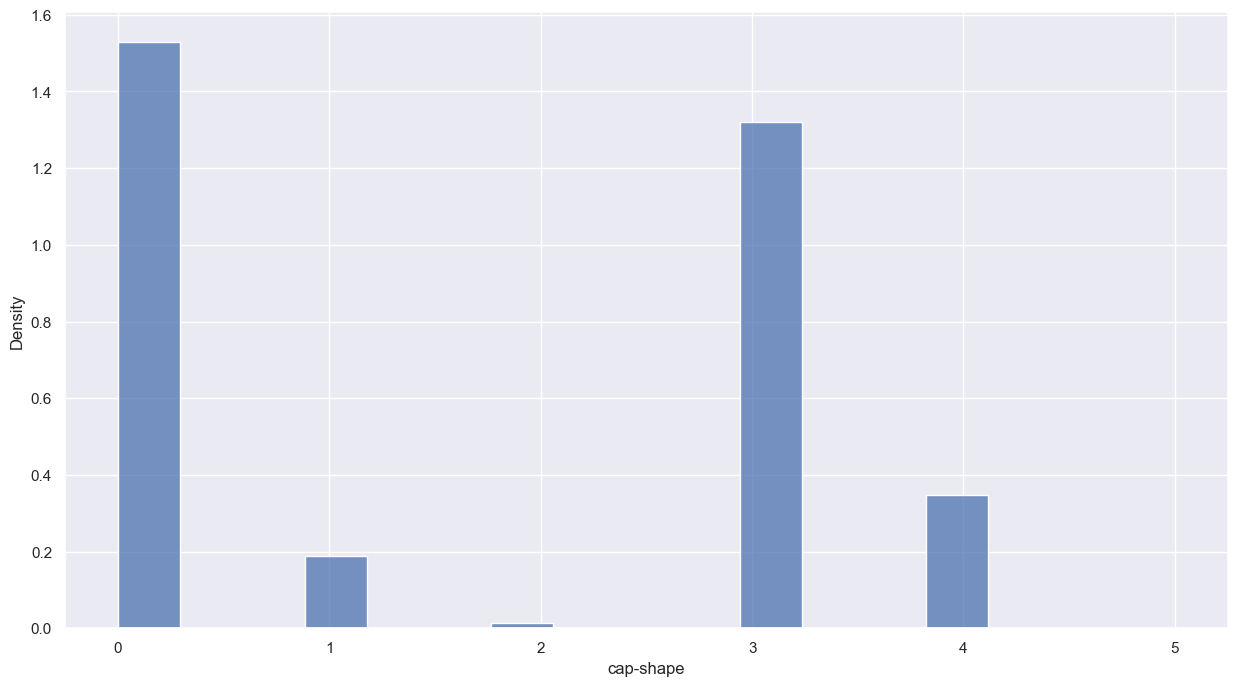

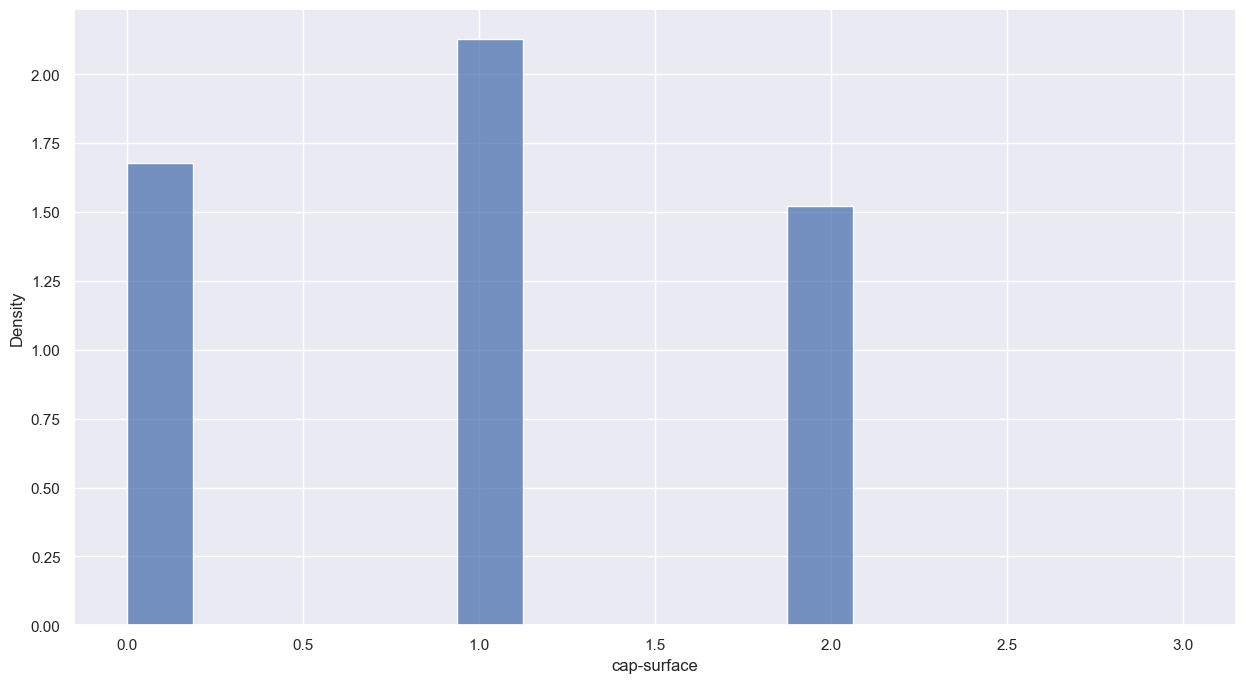

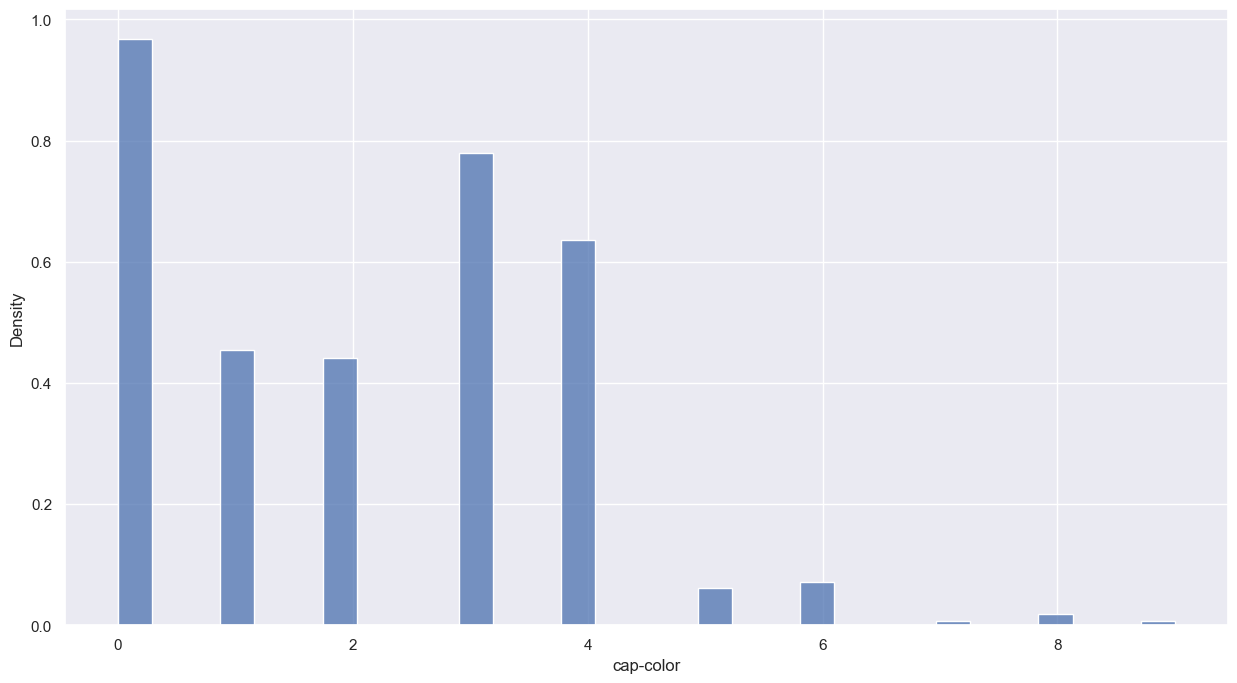

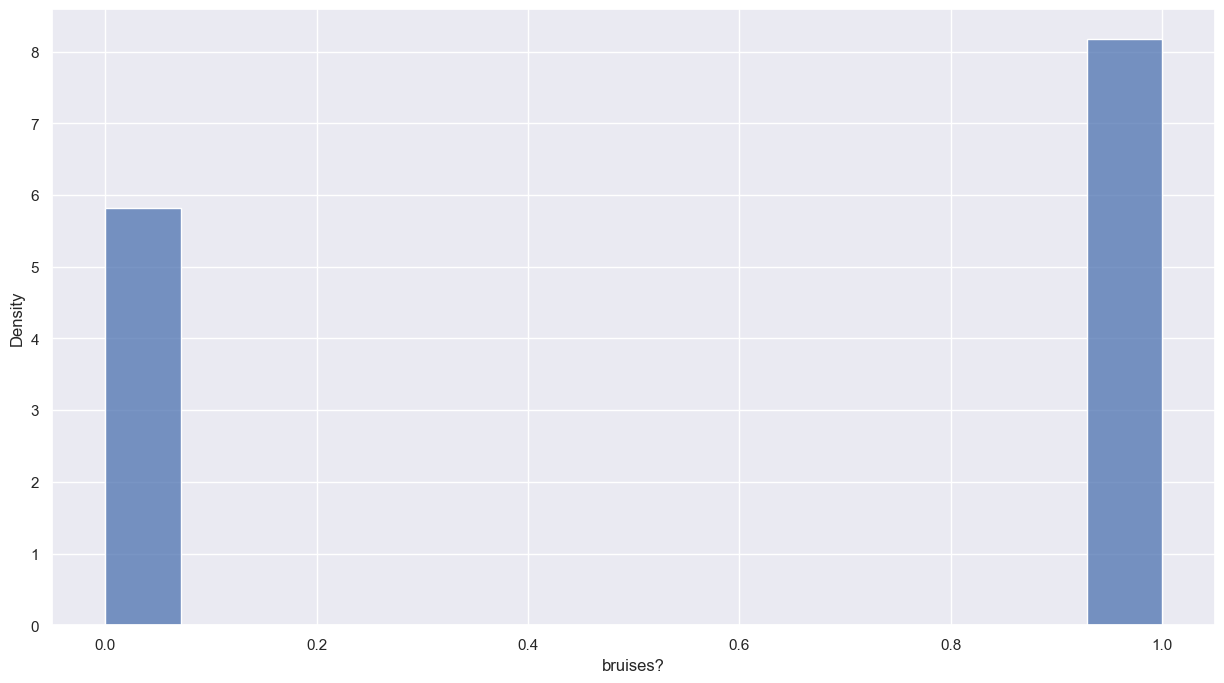

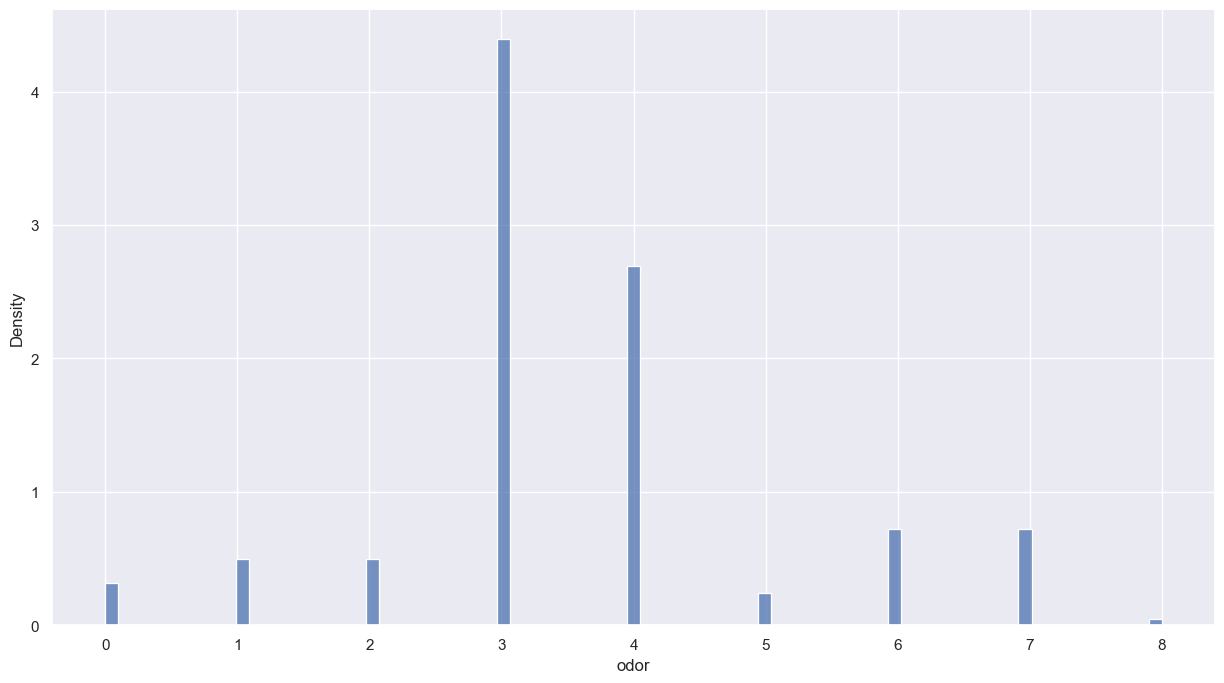

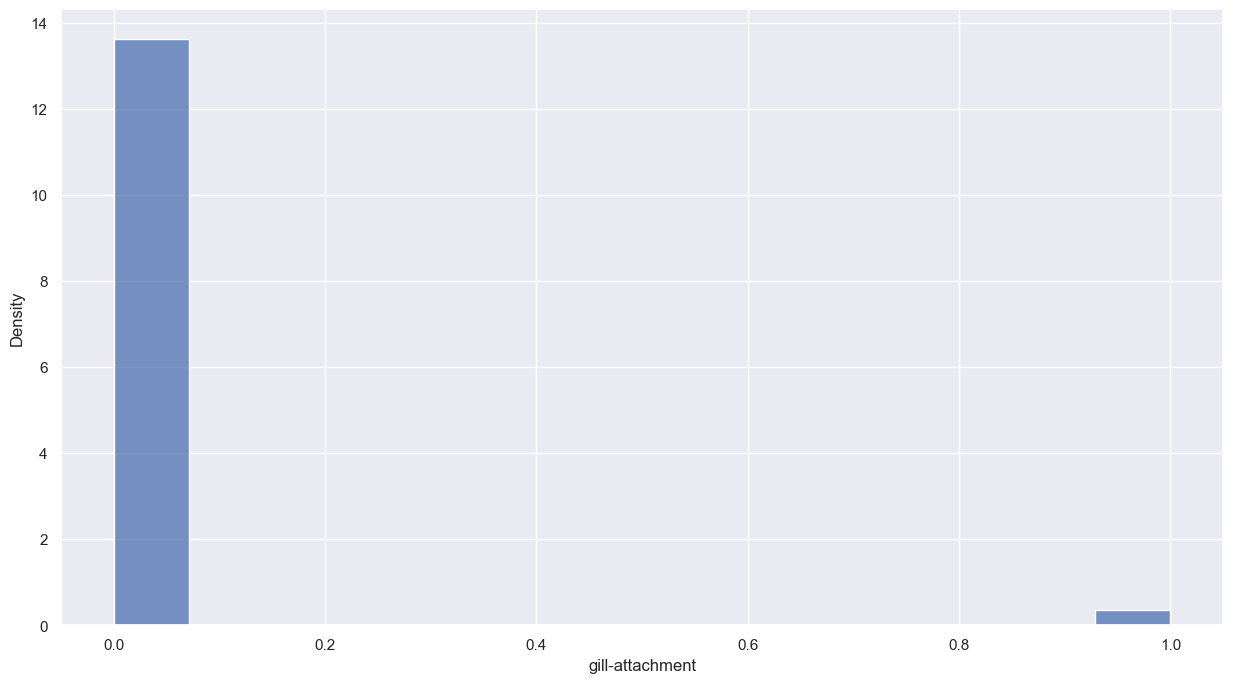

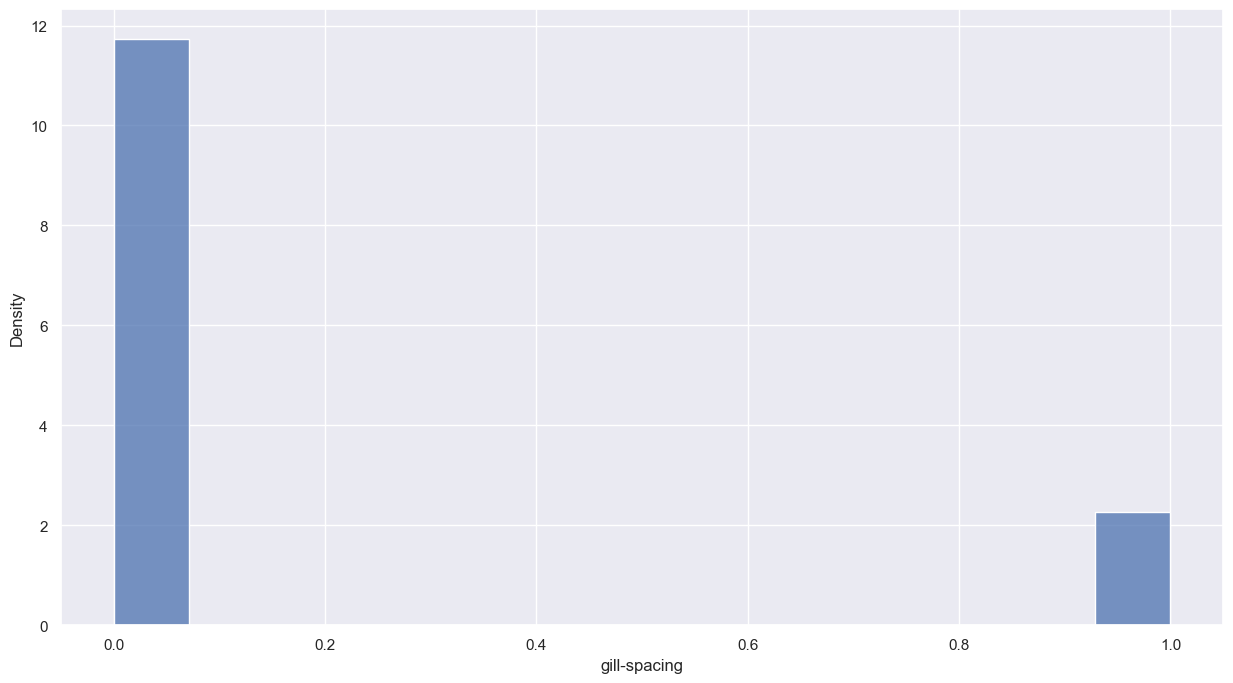

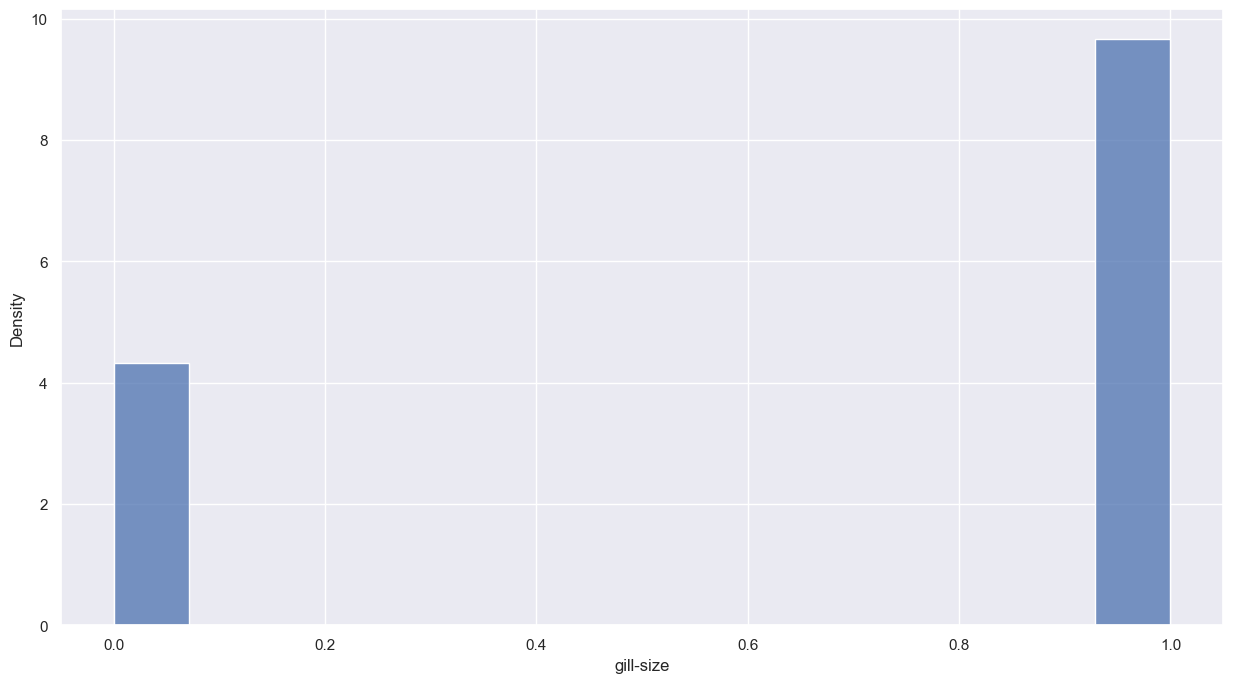

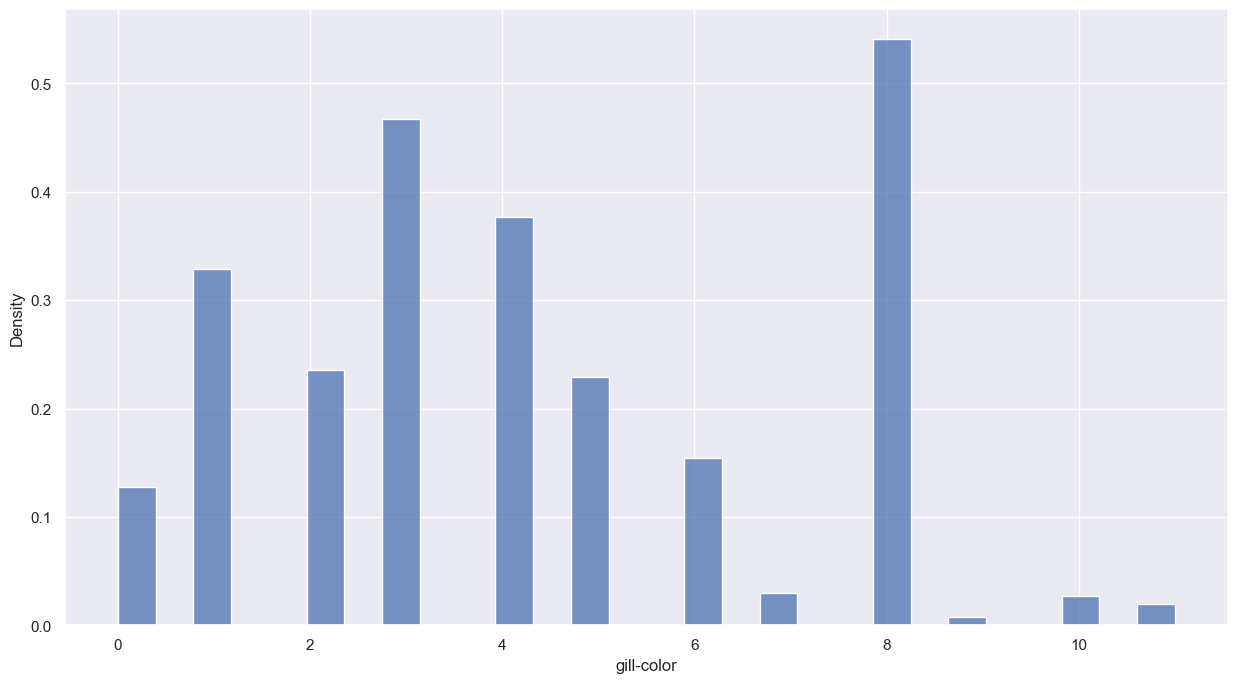

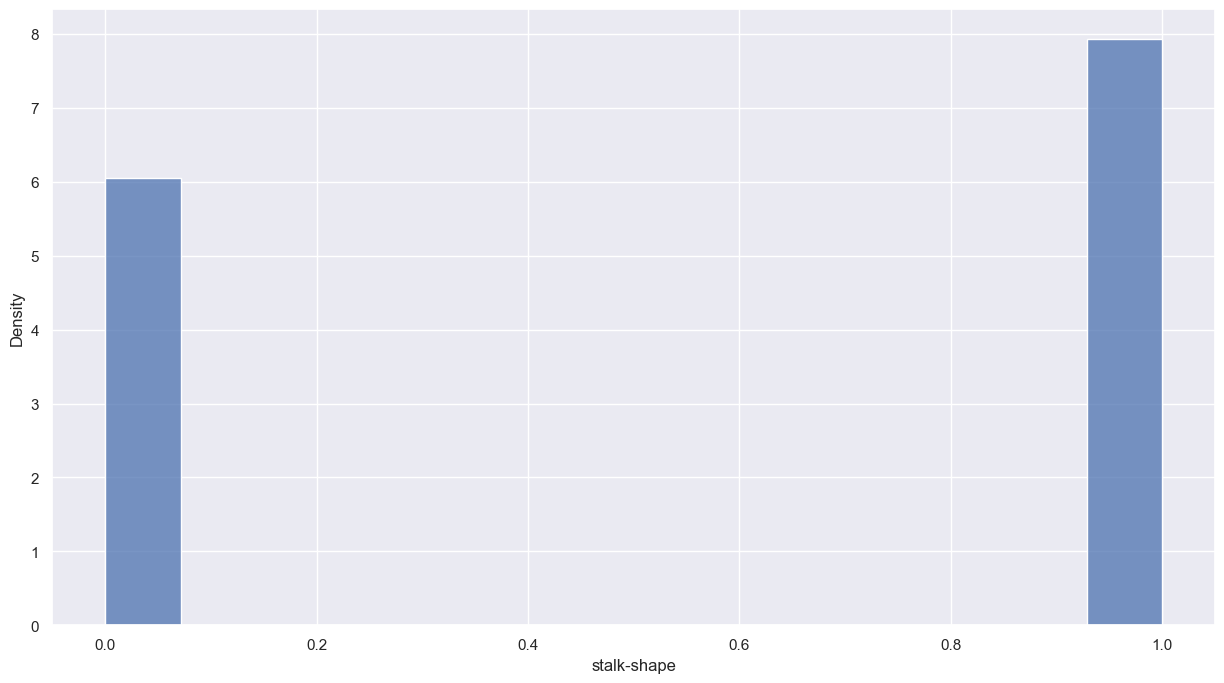

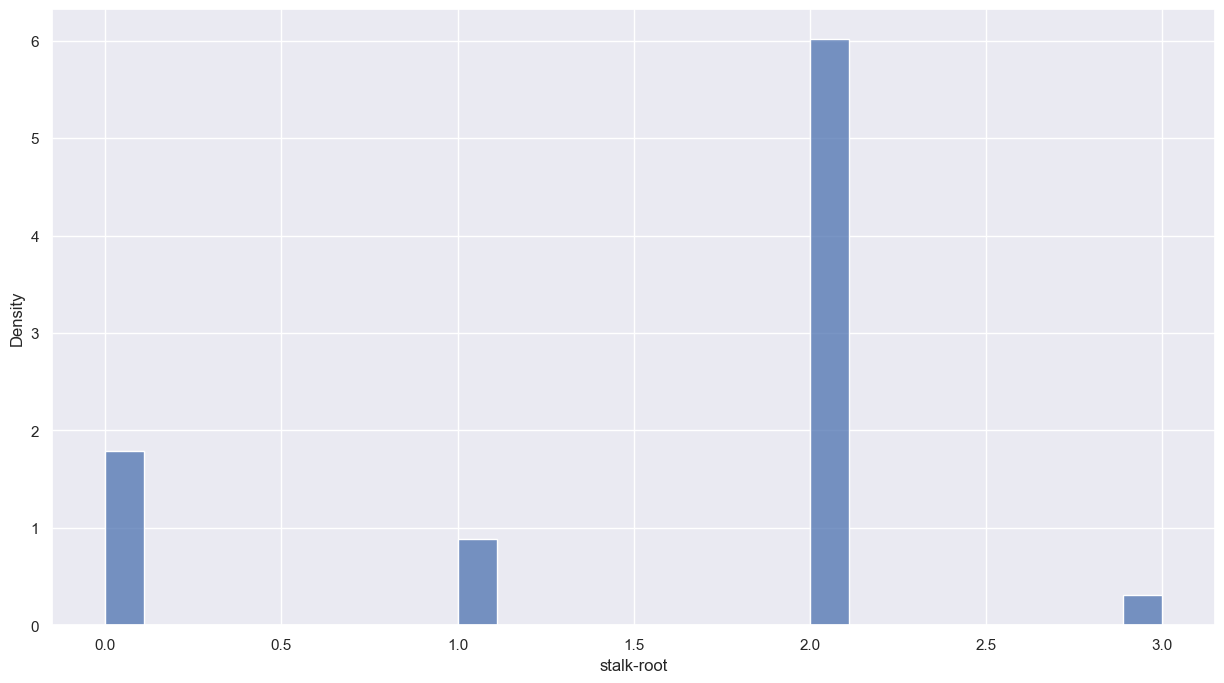

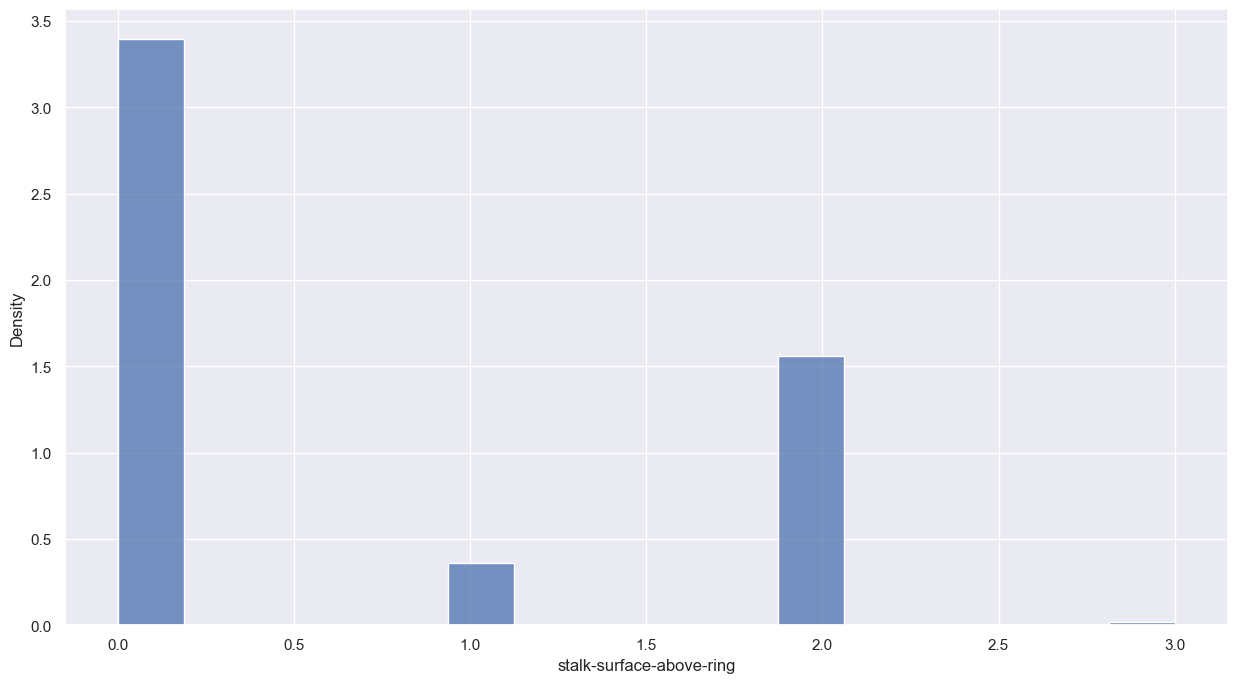

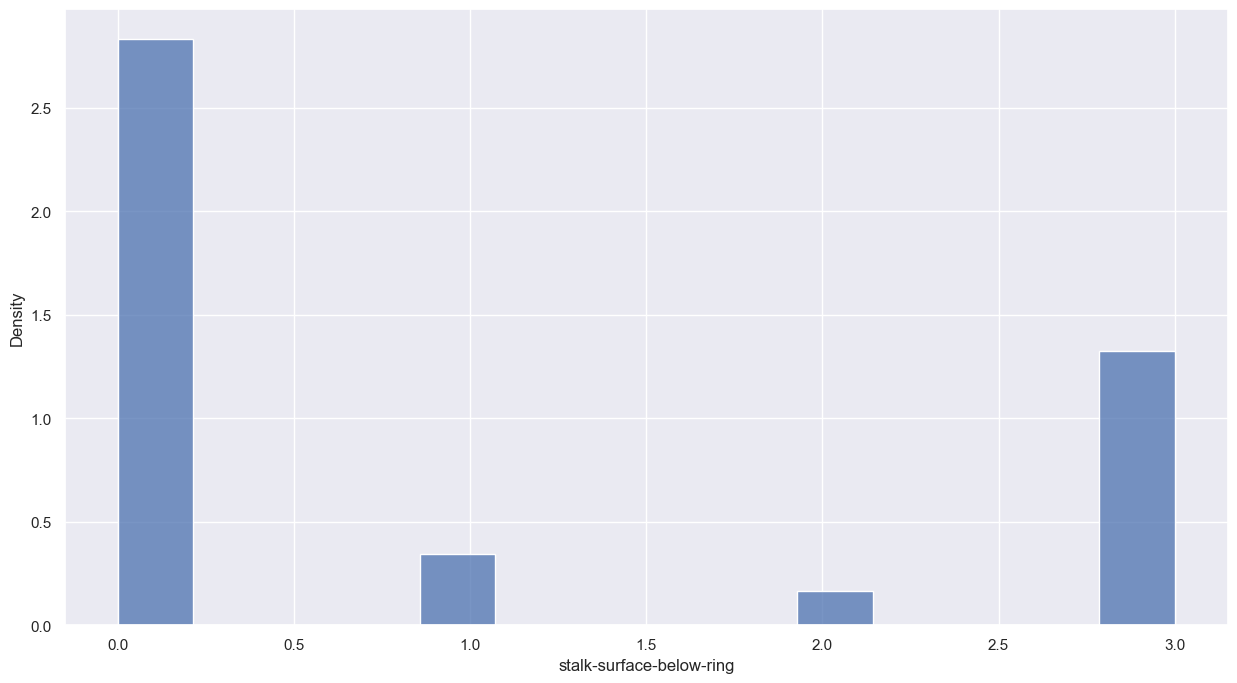

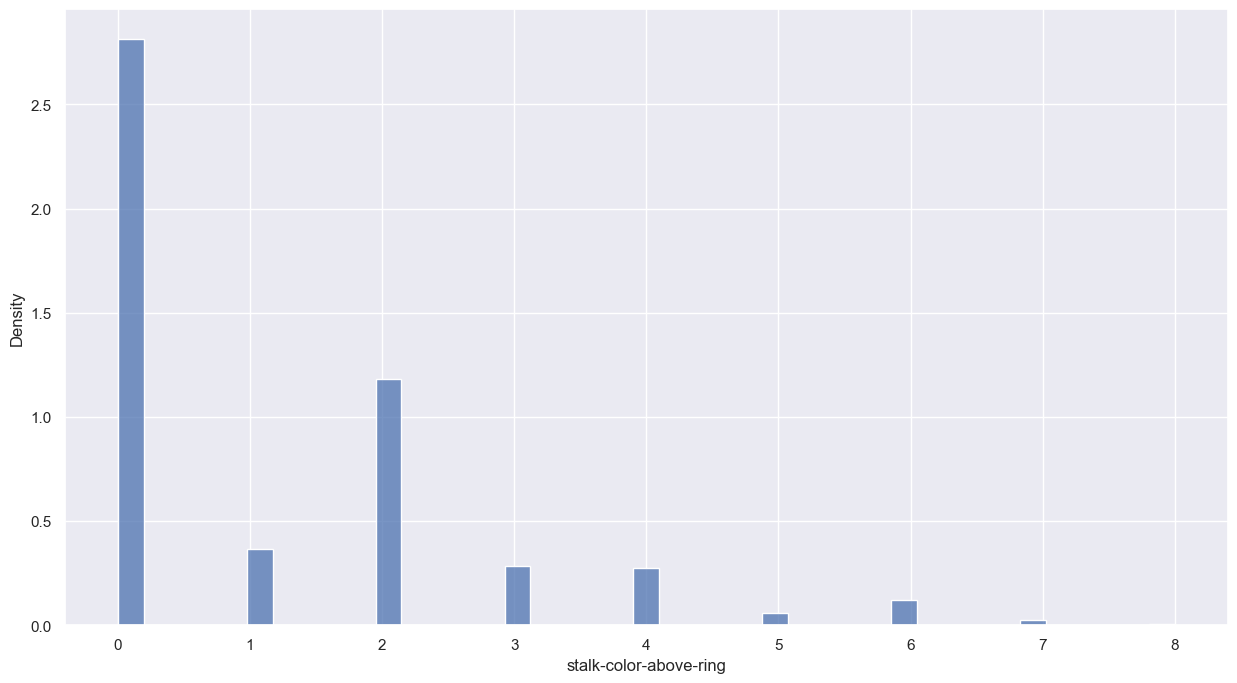

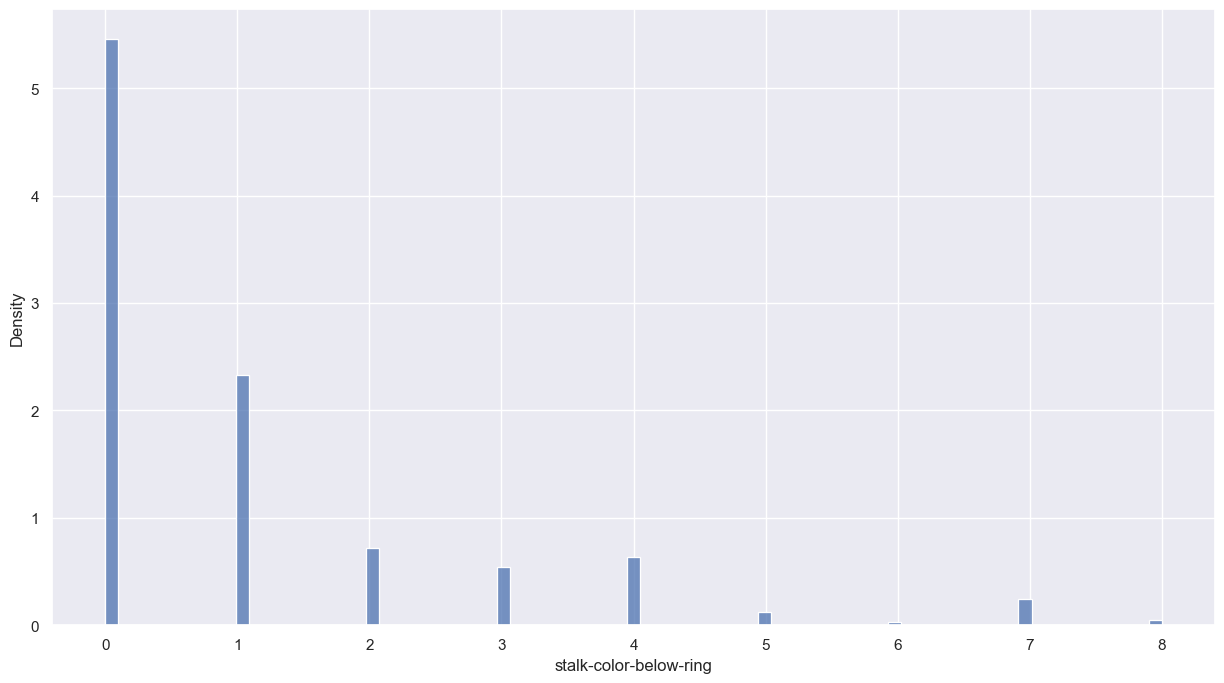

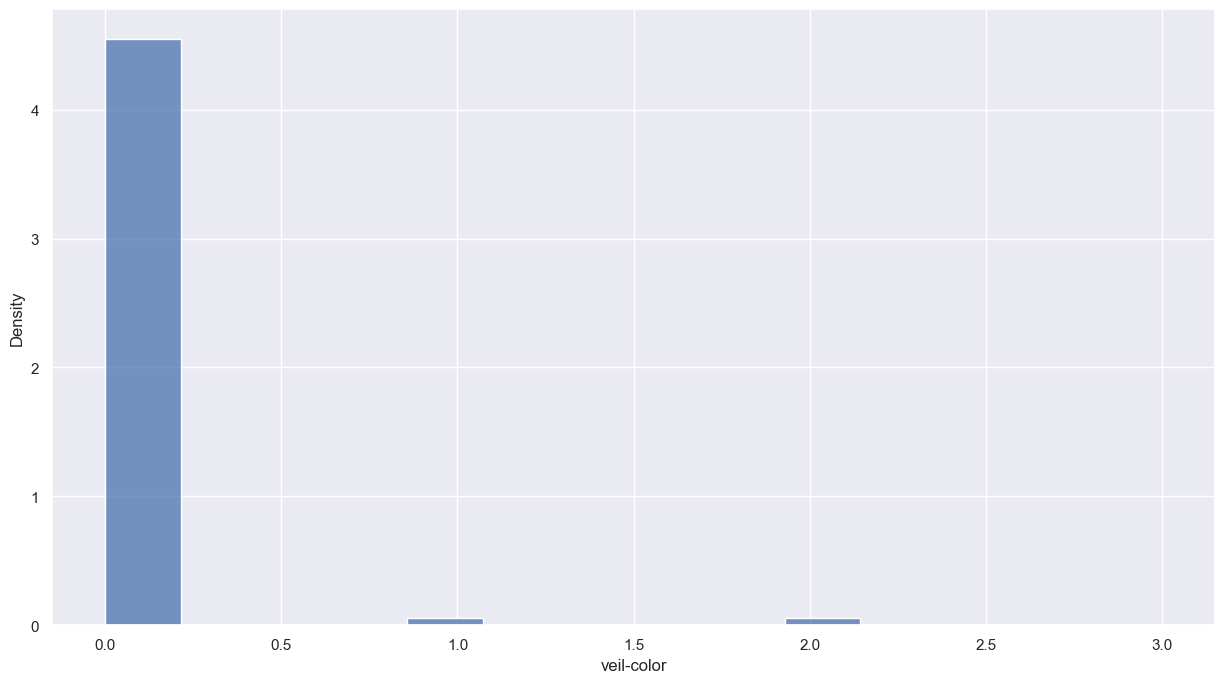

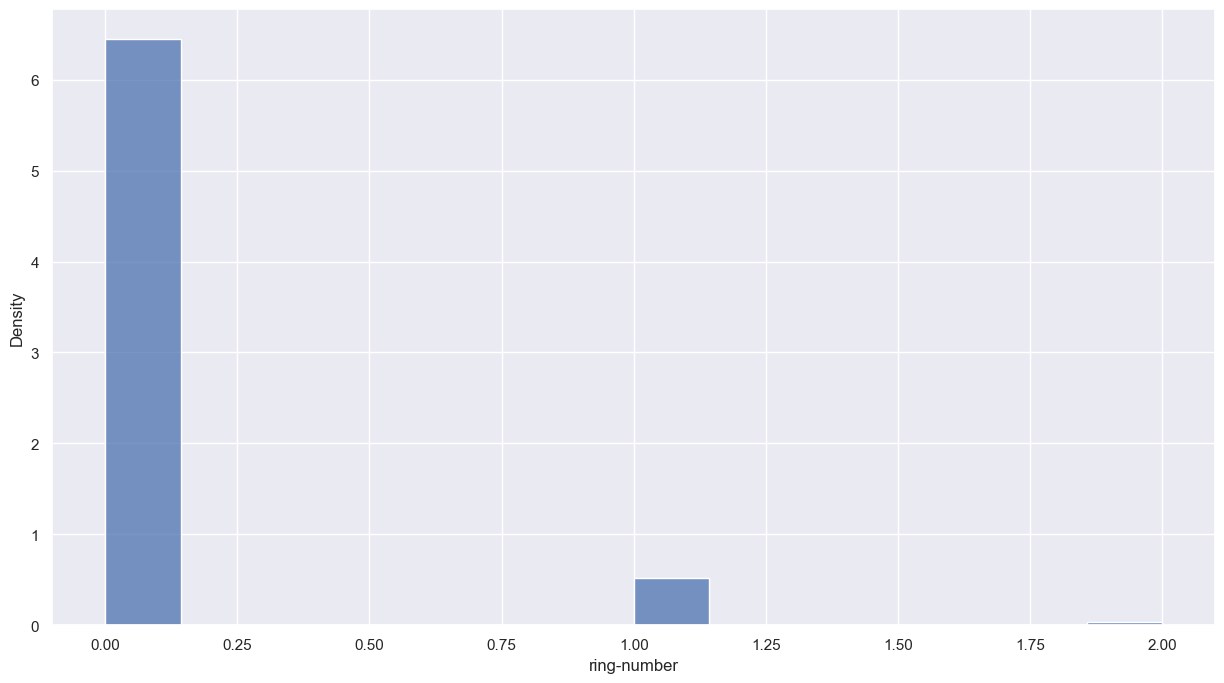

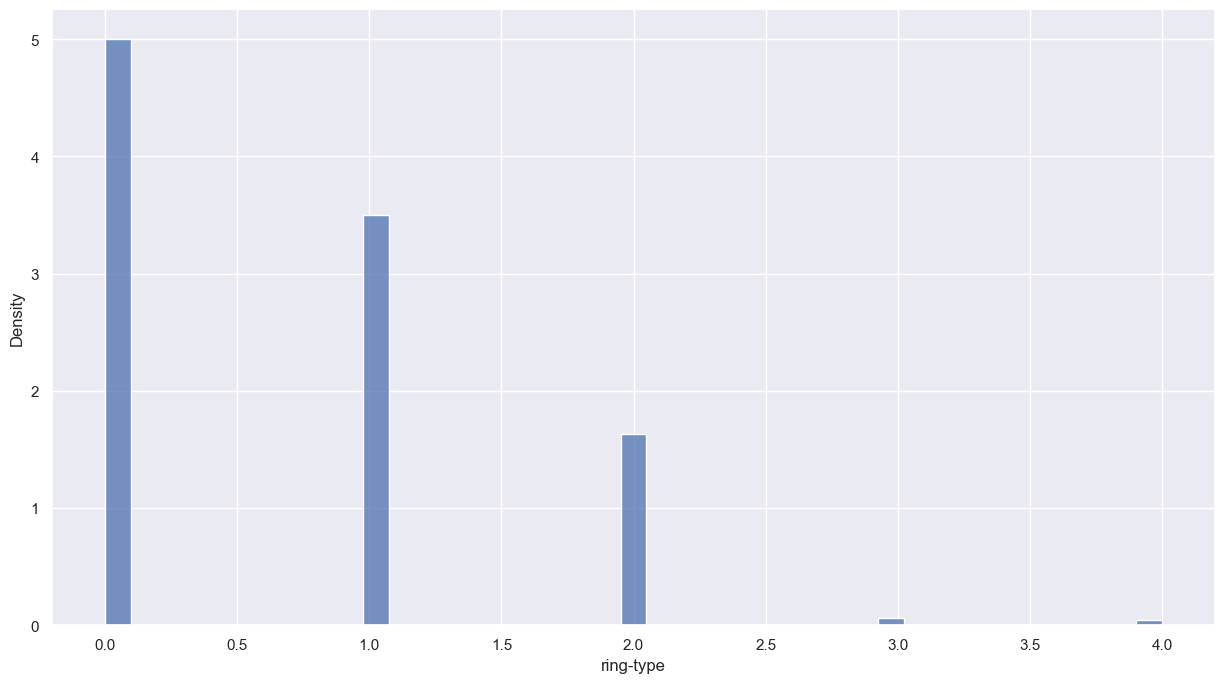

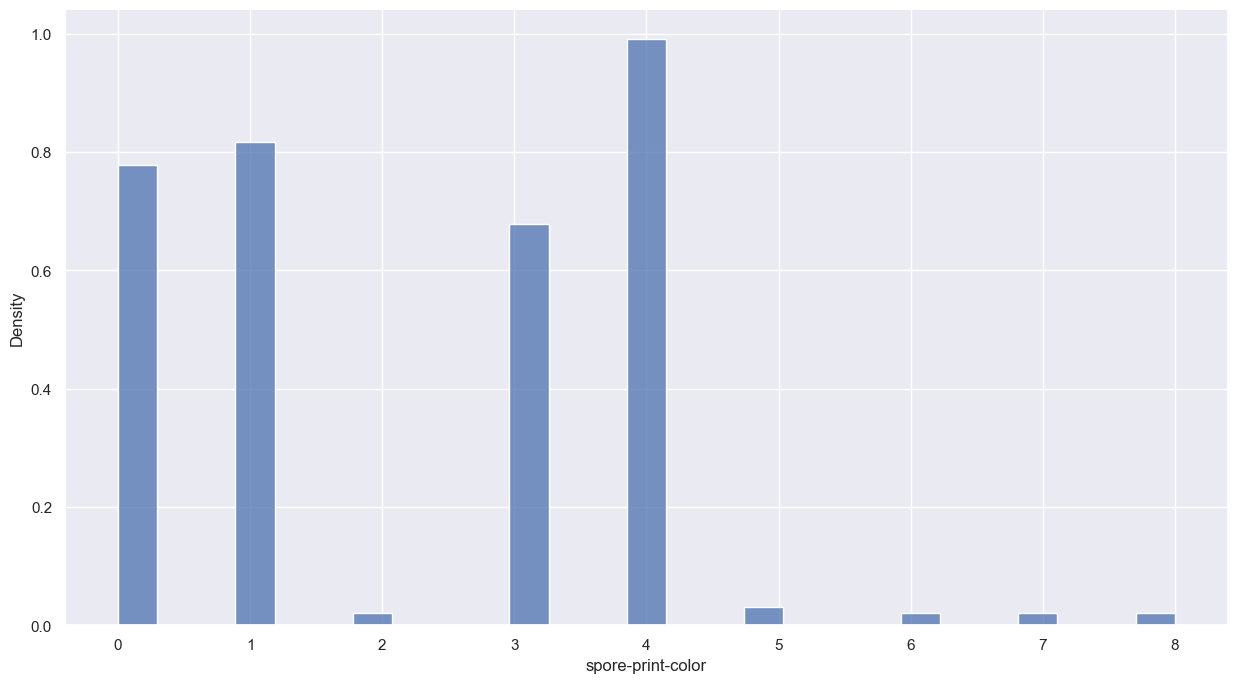

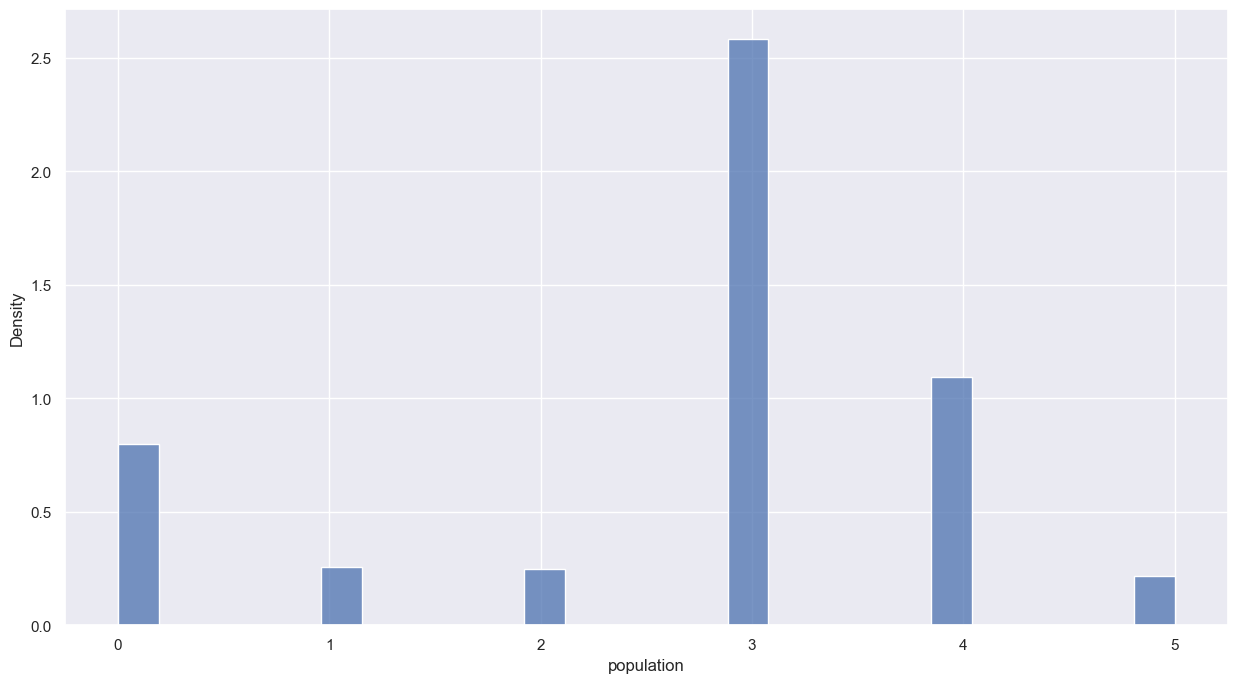

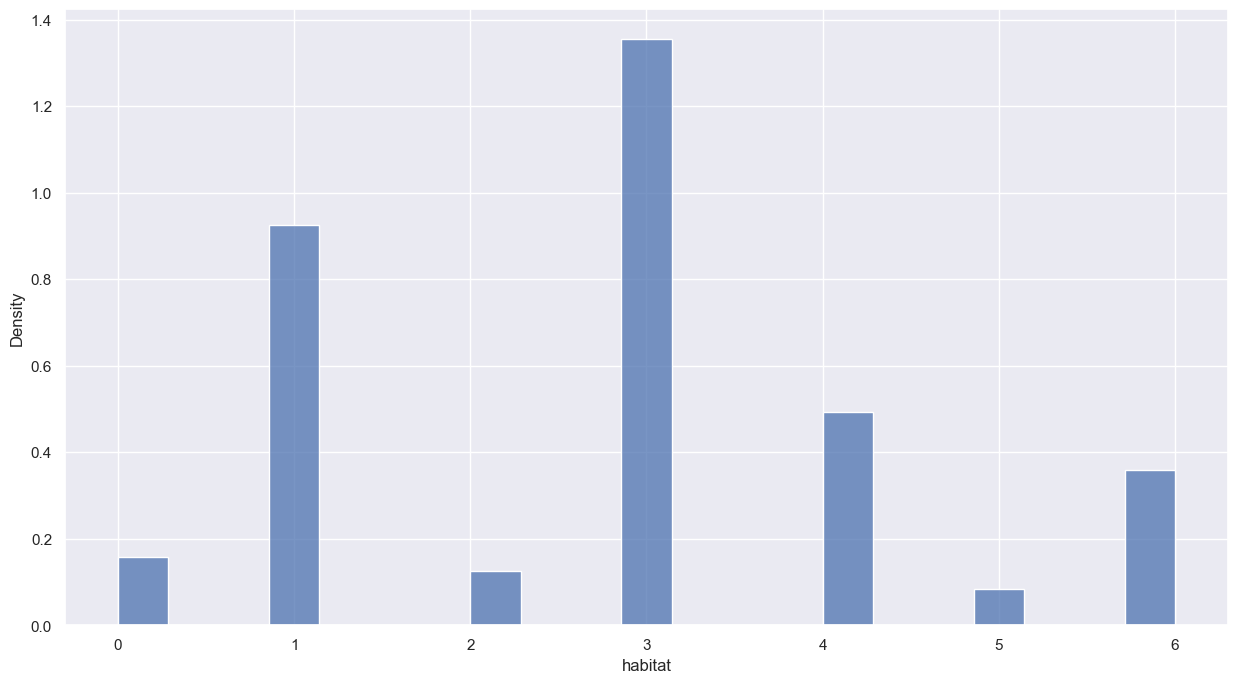

In [40]:
show_statistics(df)

Make target column the last:

In [41]:
l = list(df.columns[1:])
l.append(df.columns[0])
df = df[l]
df

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is-poisonus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,0.0,...,0.0,6.0,7.0,2.0,0.0,0.0,8.0,5.0,6.0,1.0
8120,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,0.0,...,0.0,6.0,7.0,1.0,0.0,0.0,8.0,3.0,6.0,1.0
8121,3.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,6.0,7.0,2.0,0.0,0.0,8.0,5.0,6.0,1.0
8122,4.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,1.0,...,3.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,6.0,0.0


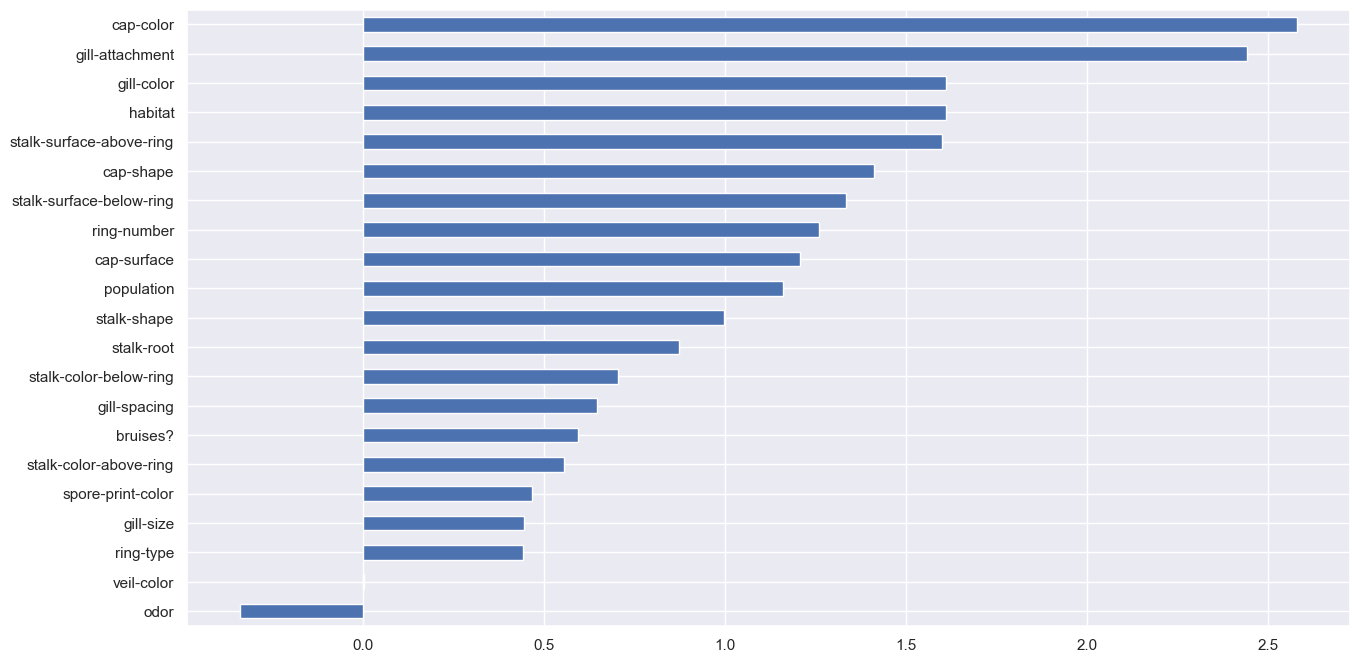

In [42]:
feature_importance = gr.data_set_gain_ratio(df, df.columns[-1], 1,
                                            pd.Series([True] * len(df.columns),
                                                      df.columns))
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh')
plt.show()

<Axes: >

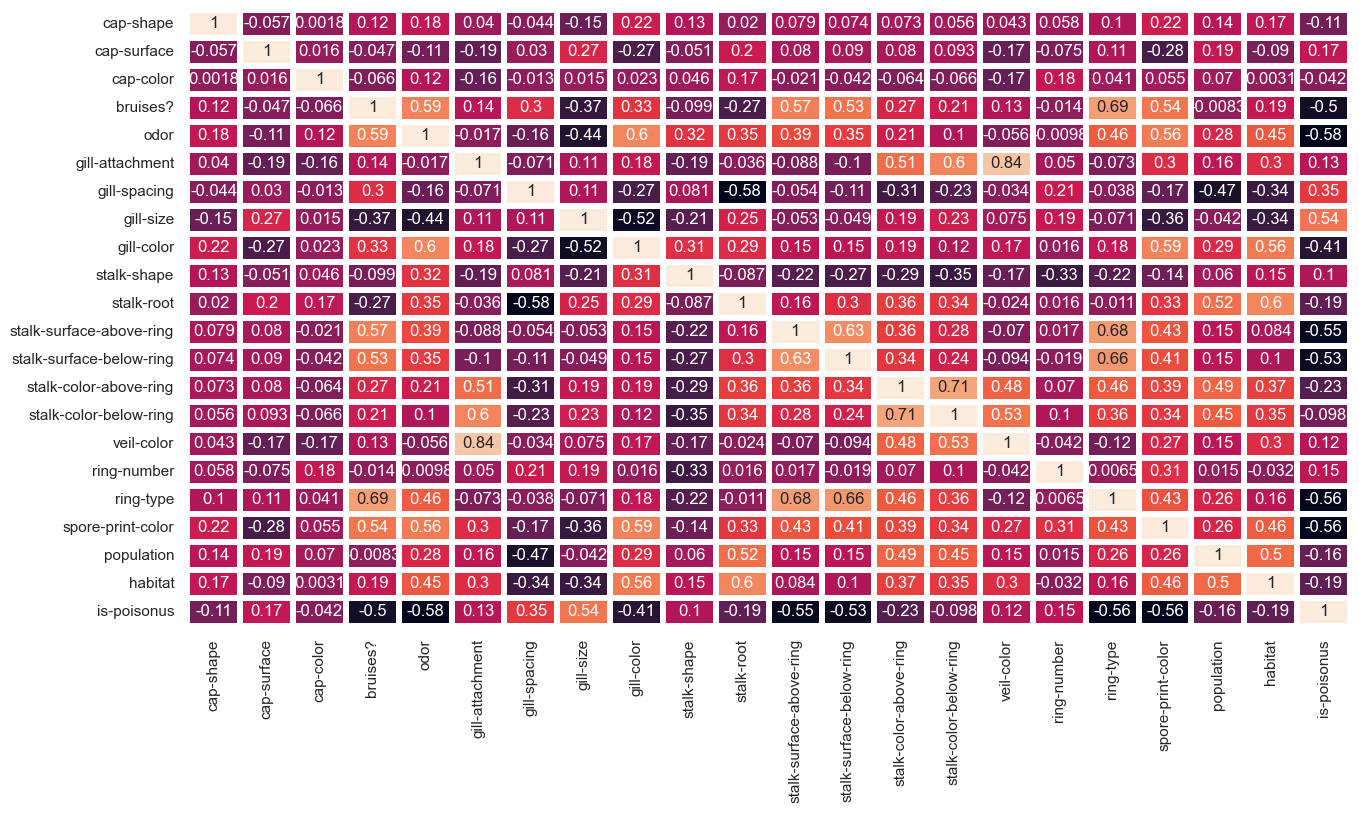

In [43]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

In [44]:
df.to_csv(os.path.join('processed', 'mushrooms.csv'), index=False)
open(os.path.join('processed', 'replacements.txt'), 'w').write(
    json.dumps(feature_replacement, sort_keys=False, indent=3))
df

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is-poisonus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,0.0,...,0.0,6.0,7.0,2.0,0.0,0.0,8.0,5.0,6.0,1.0
8120,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,0.0,...,0.0,6.0,7.0,1.0,0.0,0.0,8.0,3.0,6.0,1.0
8121,3.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,6.0,7.0,2.0,0.0,0.0,8.0,5.0,6.0,1.0
8122,4.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,1.0,...,3.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,6.0,0.0
